<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/Classification-CardioVascular-Risk-Pridiction/blob/main/PERSONAL_NOTEBOOK_%7C_CP_3_%7C_CARDIOVASCULAR_RISK_PREDICTION_%7C_SAMARJEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE 3 CLASSIFICATION - CARDIOVASCULAR RISK PREDICTION**
we have been provided with a study dataset of residents of a tow, and we have to predict from there medical conditions and habits, if there is any risk of Cardiovascular disease or problems.


# **PROBLEM STATEMENT**




*   The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
*   The dataset provides the patients’ information. It includes over 3390 records and 17 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factor
*   The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).









# **UNDERSTANDING THE PROBLEM IN BUSINESS CONTEXT**



# <b>DATA UNDERSTANDING</b>



Our Data set has 3390 obervasations and , 17 columns/features.

### <b>Demographic:</b>

id	age	education	sex	is_smoking	cigsPerDay	BPMeds	prevalentStroke	prevalentHyp	diabetes	totChol	sysBP	diaBP	BMI	heartRate	glucose	TenYearCHD

*   **id**: Unique id of the person
*   **Sex**: male or female("M" or "F")
*   **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
*   **education**: Education qualification of the person

### <b>Behavioral:</b>
  
*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
  
*   **cigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history):</b>

*   **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
   
*   **prevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
  
*   **prevalentHyp**: whether or not the patient was hypertensive (Nominal)
  
*   **diabetes**: whether or not the patient had diabetes (Nominal) 

### <b>Medical(current):</b>

*   **totChol**: total cholesterol level (Continuous)
   
*   **sysBP**: systolic blood pressure (Continuous)
   
*   **diaBP**: diastolic blood pressure (Continuous)
   
*   **BMI**: Body Mass Index (Continuous)
   
*   **heartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
   
*   **Glucose**: glucose level (Continuous)

### <b>Predict variable (desired target):</b>

*   **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **DATASET LOADING AND OVERVIEW**

## Importing Libraries and Modules.

In [72]:
import pandas as pd

import numpy as np
from numpy import math

import random

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

!pip install matplotlib --upgrade

import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures, LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV

from sklearn.feature_selection import chi2

from sklearn import metrics

from sklearn.metrics import r2_score, log_loss, mean_squared_error, accuracy_score, mean_absolute_error,  roc_auc_score, classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from sklearn.pipeline import make_pipeline

from scipy.stats import skew

from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

import xgboost as xgb

from sklearn import tree, ensemble

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


pd.options.mode.chained_assignment = None  # default='warn'

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print('matplotlib: {}'.format(matplotlib.__version__))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
matplotlib: 3.6.3


## Dataset Loading

In [73]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1jv8AyntOWWJDWyEv1TtsCYLXAmCYZf9N/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [74]:
# Creating a copy, for working on it without harming the orignal dataset.
cvd_df = df.copy()


## Data Overview

In [75]:
# checking top 5 Rows or instances.
cvd_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [76]:
# checking last 5 Rows or instances.
cvd_df.tail()      

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [77]:
# checking total rows and columns ( Rows, Columns).
cvd_df.shape

(3390, 17)

Some insights:-
1.  We have 8760 instances and 14 features.

In [78]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Some insights:-
1. We do not have any null values present in any column
2. We have 4 columns which have object data type. others are either float64 or int64.

In [79]:
# checking description of all data types columns.
cvd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [80]:
# Checking for unique values in each column
cvd_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [81]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **DATASET CLEANUP**

## Duplicate check

In [82]:
# Checking for duplicate values
len(cvd_df[cvd_df.duplicated()])

0

## Null or missing values

### *Checking for null values*

In [83]:
# Checking for null or missing values in every column
cvd_df.isnull().sum()


id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<AxesSubplot: >

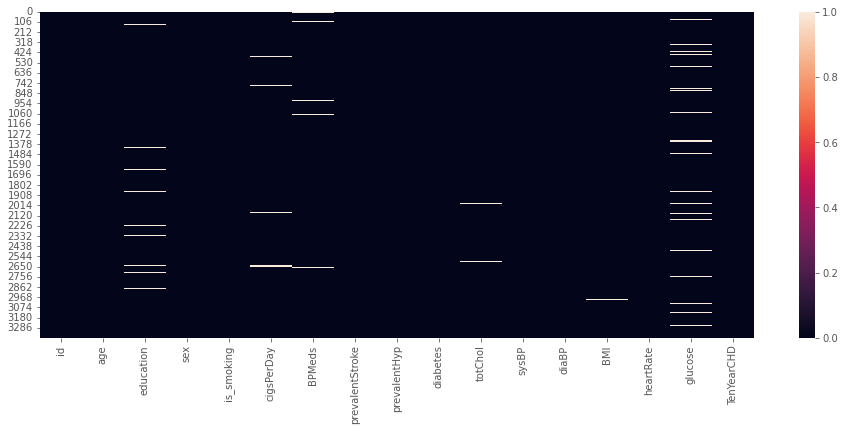

In [84]:
# PLotting missing and null values in a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(cvd_df.isnull())

Some insights:-
1. Null values are present in these rows:
*   education
*   cigsPerDay
*   BPMeds
*   totChol
*   BMI
*   heartRate
*   glucose



In [85]:
# Checking number of rows in which null values are present
count = 0
for i in cvd_df.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)

Total number of rows with missing values is  463


Explaination:-
* So, removing all null values will result in loss of almost 463 observations and we wil be left with almost 2927 columns.

In [86]:
# Percentage of null values in the respective columns
(cvd_df.isnull().sum()/cvd_df.shape[0]*100).sort_values(ascending=False)

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64

### *Dealing will null values*

Explaination:-
* As the data is missing and replacing it with mean, median or mode will make the dataset biased, and in case of medical data we cant take risk, so to avoid any such biasness in model learning we will delete those observations.We also havent got any prior request from the business regarding the handling of null values.

* We cant take risk as replacing such value may affect the number of false positives and false negatives.


In [87]:
cvd_df.shape

(3390, 17)

In [88]:
# Deleting null values observations
cvd_df.dropna(how = "any", inplace= True)

# Resetting index
cvd_df.reset_index(inplace = True, drop = True)

# Shape of the dataset now
cvd_df.shape



(2927, 17)

In [89]:
# Re-Check for null values in the new dataset
cvd_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Dropping unnecessary features

In [90]:
#Dropping 'id' feature
cvd_df.drop("id",axis=1,inplace=True) 

# #Dropping 'education' feature
# cvd_df.drop("education",axis=1,inplace=True) 


Explaination:-
*  Since ID has no effect on target variable so we will drop this column from our dataset.

* As there is no explaination of the column education from the business. we will first see, it it is higly correlated to our deoendent variable we might keep it.


## Encoding column SEX and IS_SMOKING

In [91]:
label_encoding = {'sex' : {'M': 0, 'F': 1}, 'is_smoking' : {'NO' : 0, 'YES' : 1}}

cvd_df = cvd_df.replace(label_encoding)

## Dividing into categorical and numerical features.

In [92]:
categorical_features= ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

numerical_features= ['age', 'cigsPerDay',  'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

independent_features= ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'age', 'cigsPerDay',  'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

dependent_features=['TenYearCHD']

# **EDA**

In [93]:
cvd_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,3.0,1,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **UNIVARIATE ANALYSIS**

In [94]:
def clr():
  colors=['green', 'blue', 'purple','red', 'orange', 'maroon', 'yellow', ]
  clr= random.choice(colors)
  return clr

### 1. Histogram for all columns

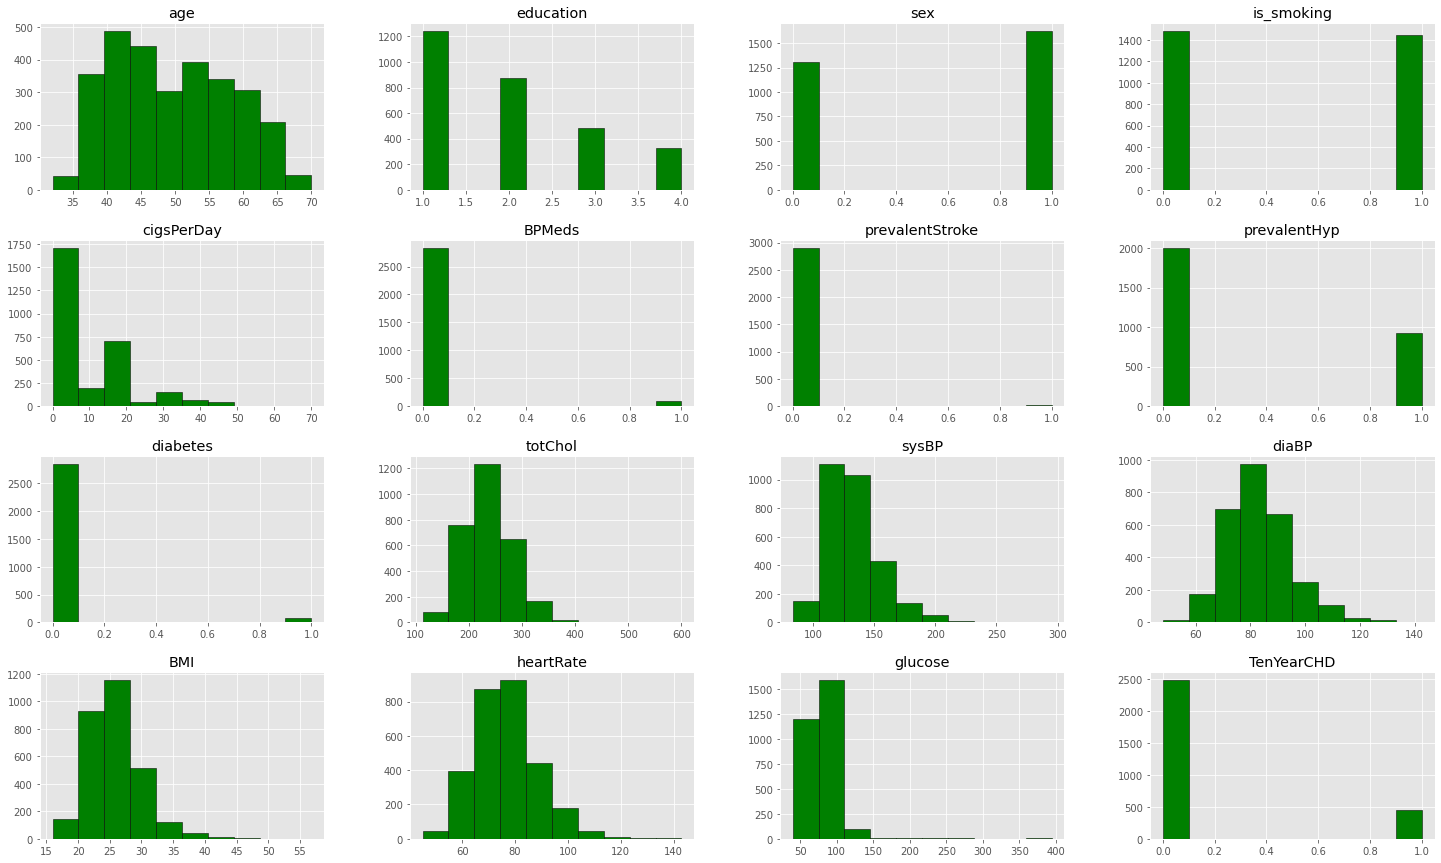

In [95]:
# it shows the value distribution in each columns


plt.style.use('ggplot')
cvd_df.hist(figsize=(25,15),color = clr(), ec="black")
plt.show()

### 2. Correlation heatmap

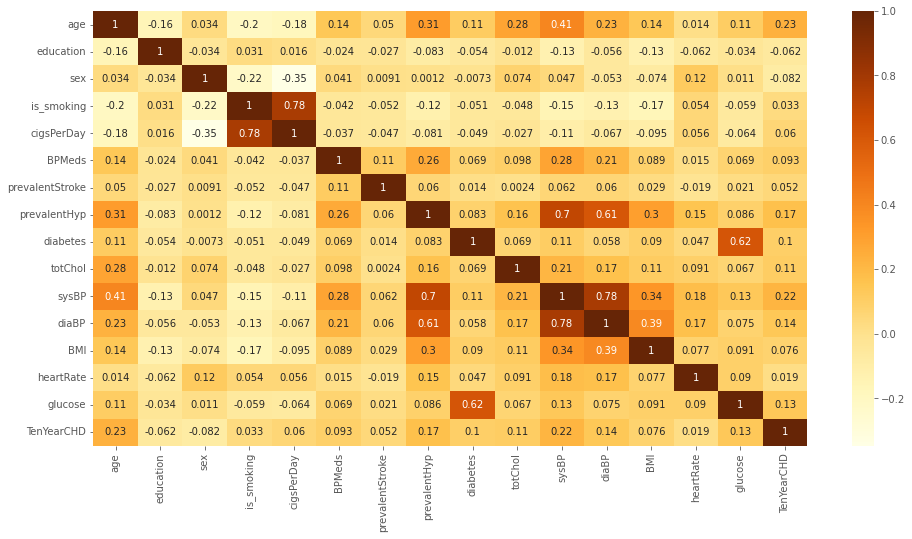

In [96]:
# Printing correlation heatmap
plt.figure(figsize = (16,8))
sns.heatmap(cvd_df.corr(),annot=True,cmap="YlOrBr")
plt.show()

Explaination:-
1. diabetes and glucose are higly correlated, as we know in diabetes the sugar/glucose in blood gets high as body do not produce insulin to break it and use as a energy source and so the sugar level rises in a person.
2. sysBP and diaBP are highly correlated to each other and prevalentHyp(hypertensive-high blodpressure problem) and BPmeds as hypertensive problem requires medications.
3. TenYearCHD is positively correlated to age, hprevalenthyp(hypertensive), totChol(cholestrol) and diabetes. so if a person has all these diseases and issues, he/she might be vulnurable of getting CHD.
4. BMI (body mass index) is also positively correlated to prevalentHyp. so as BMI increases prevalentHyp increases.
5. Education and cigsperday are negatively correlated to age, we can say people with high age, consume less cegrates per day and may have less education qualification.


We can say that ***TenYearCHD*** is positively correlated to these top 7 
features in Decending order.
1. Age....................................- (0.23)
3. sysBP.................................- (0.22)
3. prevalentHyp....................- (0.17)
4. diaBP.................................- (0.14)
5. glucose.............................- (0.13)
6. totchol...............................- (0.11)
7. diabetes.............................- (0.10)




### 3. Age distribution

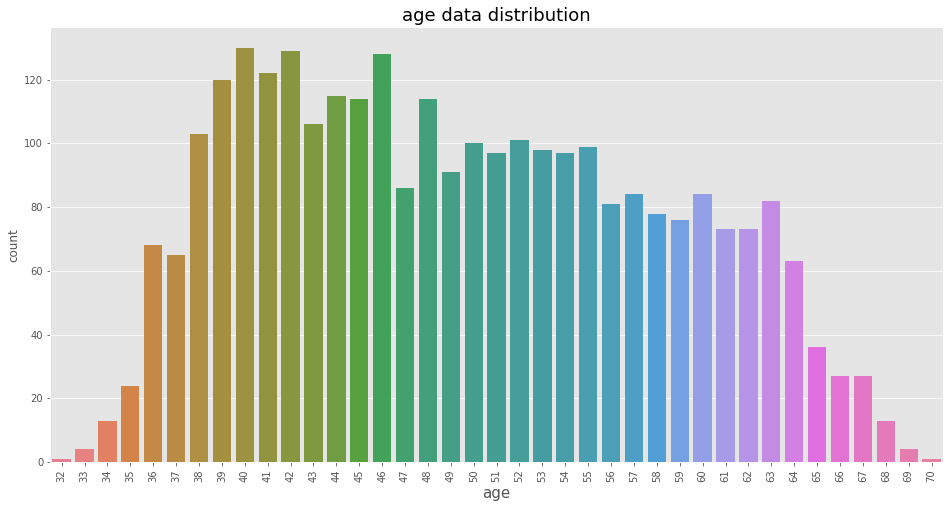

In [97]:
# Distribution of age
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'age', data=cvd_df , palette='husl')
ax.set_xlabel( 'age' , size = 15 )
ax.set_title( 'age data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have most of the data of age between 38 to 46 years old people.
* Minimum data is available of age 32 to 34 and from 68 to 70. 

### 4. Distribution of Sex

Text(0.5, 1.0, 'Distribution of Sex(Gender)')

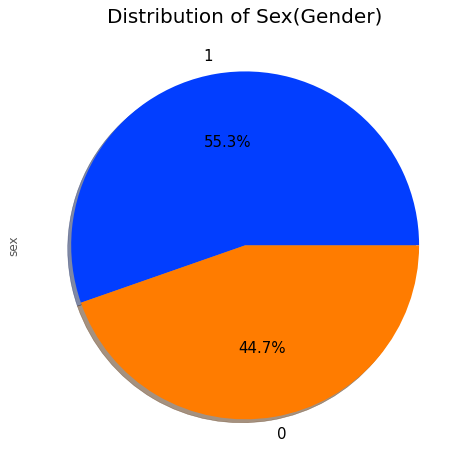

In [98]:
# Distribution of sex
plt.figure(figsize=(16,8))
palette_color = sns.color_palette('bright')
cvd_df['sex'].value_counts().plot(kind='pie',colors= palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of Sex(Gender)', fontsize=20)

Explaination:-
* We have more data of females as compared to males.

### 5. Distribution of is_Smoking

Text(0.5, 1.0, 'is_smoking data distribution')

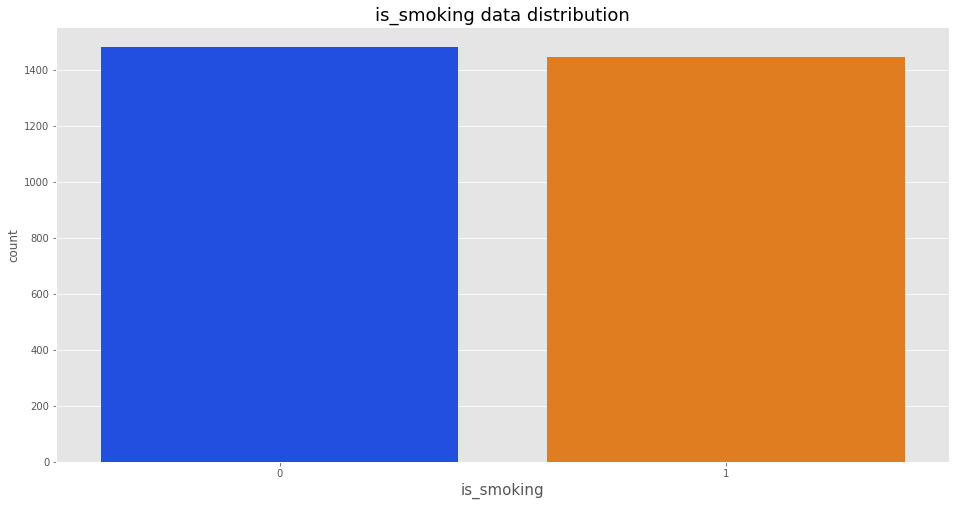

In [99]:
# Distribution of age
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'is_smoking', data=cvd_df , palette='bright')
ax.set_xlabel( 'is_smoking' , size = 15 )
ax.set_title( 'is_smoking data distribution' , size = 18 )

Explaination:-
* We have less smokes in out provided dataset.


### 7. Distribution of TenYearCHD

Text(0.5, 1.0, 'Distribution of TenYearCHD')

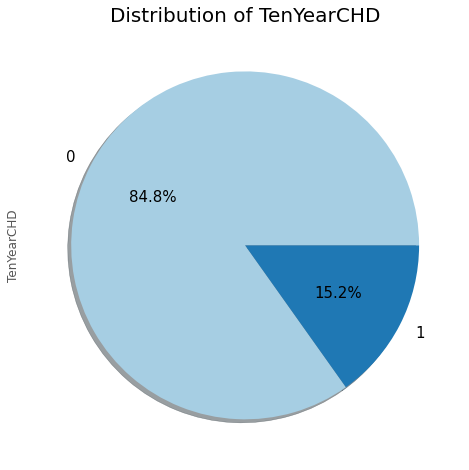

In [100]:
# Distribution of TenYearCHD
plt.figure(figsize=(16,8))
palette_color = sns.color_palette('Paired')
cvd_df['TenYearCHD'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

Explaination:-
* In our dataset the dependent variable, the onewe are going to predict is 15.2% of the total observations.

### 8. Distribution of Diabetes

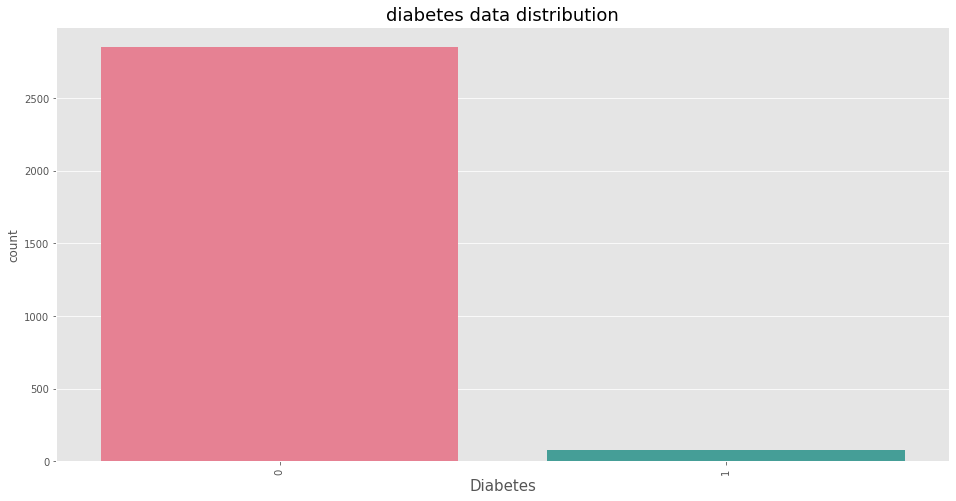

In [101]:
# Distribution of age
plt.figure(figsize = (16,8))
sns.countplot(x= 'diabetes', data=cvd_df , palette='husl')
plt.xlabel( 'Diabetes' , size = 15 )
plt.title( 'diabetes data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have very less diabetic patients in the dataset as compared to non-diabetic paitents.

### 9. Education data distribution

Text(0.5, 1.0, 'education data distribution')

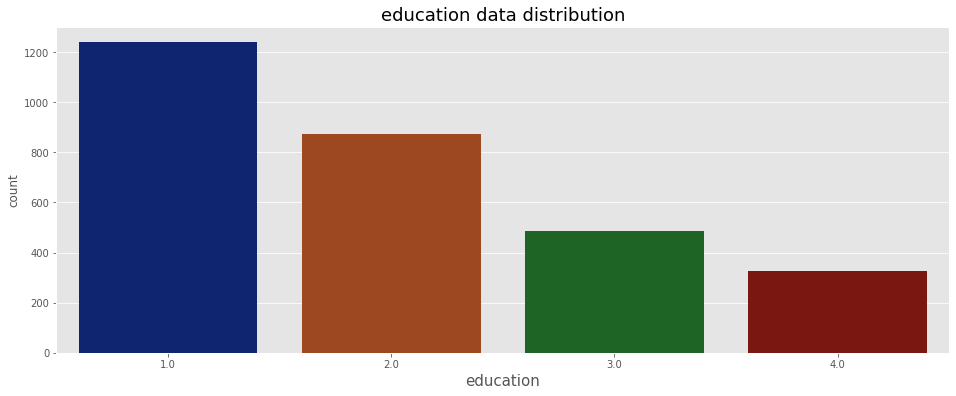

In [102]:
fig, ax = plt.subplots(figsize = (16,6))
sns.countplot(x= 'education' , data=cvd_df , palette='dark')
ax.set_xlabel( 'education' , size = 15 )
ax.set_title( 'education data distribution' , size = 18 )

Explaination:-
* there are more level 1 education people in the record and as the education level increases till 4th level, the number of peope possessing  it are getting leniarly lesser.

## **Bivariate analysis**

In [104]:
def clr_pal():
   clr_pal=random.choice([ "bright", "dark", "colorblind","rocket", "icefire","Spectral","coolwarm", "Paired", "Set2"])
   return clr_pal

def visualizer(column, ticks_lst=[], table='yes'):
  
  if cvd_df[f'{column}'].nunique()<70:
    if table=='yes':
      print(pd.DataFrame(cvd_df.groupby('TenYearCHD')[column].value_counts().unstack(0).rename(columns ={0:'>----Not at Risk---->', 1: '>----At Risk---->'})))
    plt.figure(figsize=(16,8))
    ax = sns.countplot( x= f'{column}' , hue='TenYearCHD' ,data= cvd_df,  palette=(str(clr_pal())) )
    for i in ax.containers:
      ax.bar_label(i,)
    plt.title(f'The effect of column "{column.upper()}" on the target column TenYearCHD ',size=20)
    plt.legend(['No Risk','At Risk'])

    if len(ticks_lst) != 0:
      ax.set(xticklabels = (ticks_lst))

    plt.show()

### 1. TenYearCHD vs age

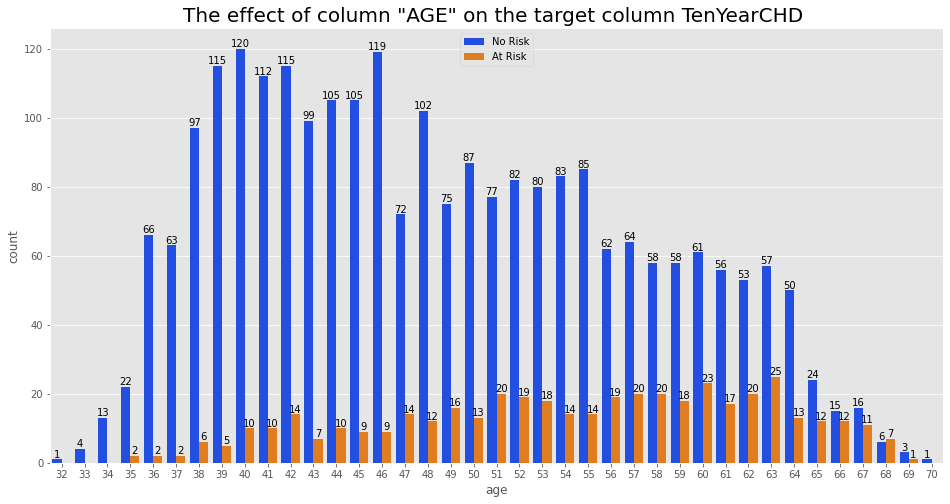

In [105]:
visualizer('age', table='no')

### 2. TenYearCHD vs education

TenYearCHD  >----Not at Risk---->  >----At Risk---->
education                                           
1.0                          1009                231
2.0                           766                108
3.0                           426                 61
4.0                           282                 44


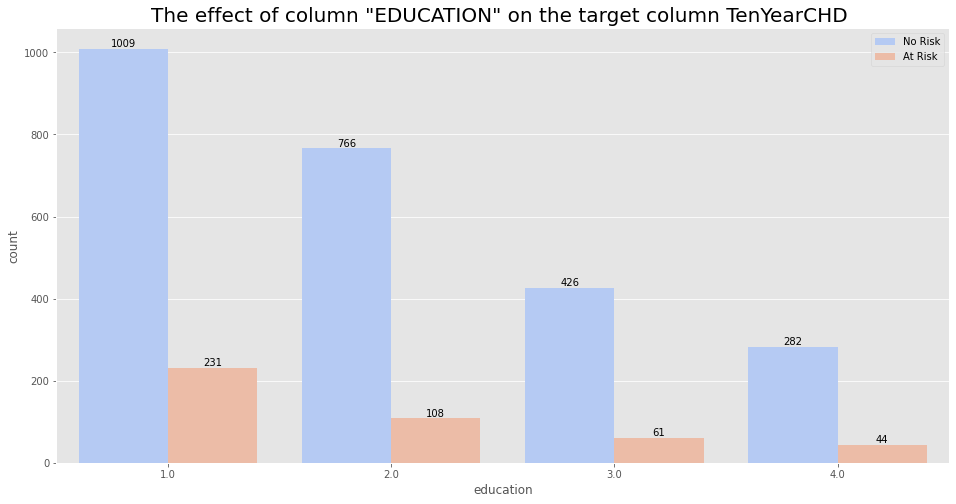

In [106]:
visualizer('education')

### 3. TenYearCHD vs sex

TenYearCHD  >----Not at Risk---->  >----At Risk---->
sex                                                 
0                            1066                241
1                            1417                203


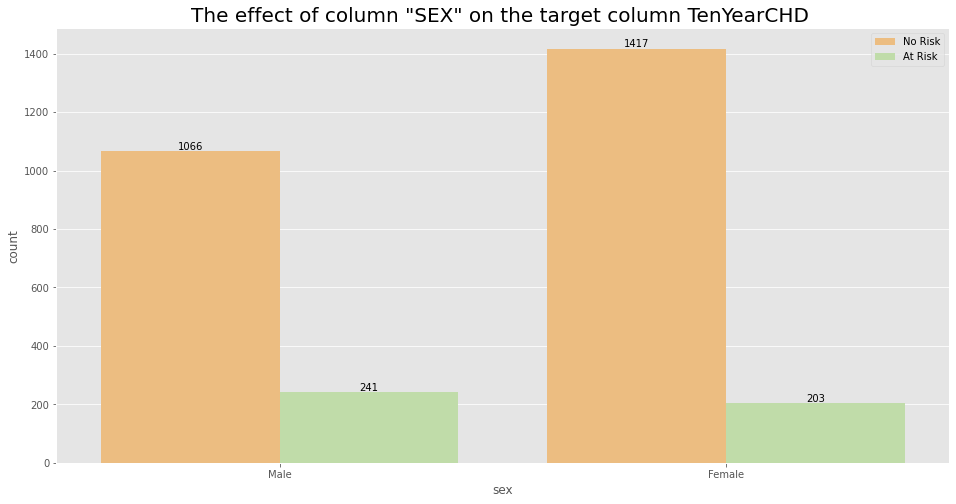

In [107]:
visualizer('sex',['Male','Female'])

### 4. TenYearCHD vs is_smoking

TenYearCHD  >----Not at Risk---->  >----At Risk---->
is_smoking                                          
0                            1273                207
1                            1210                237


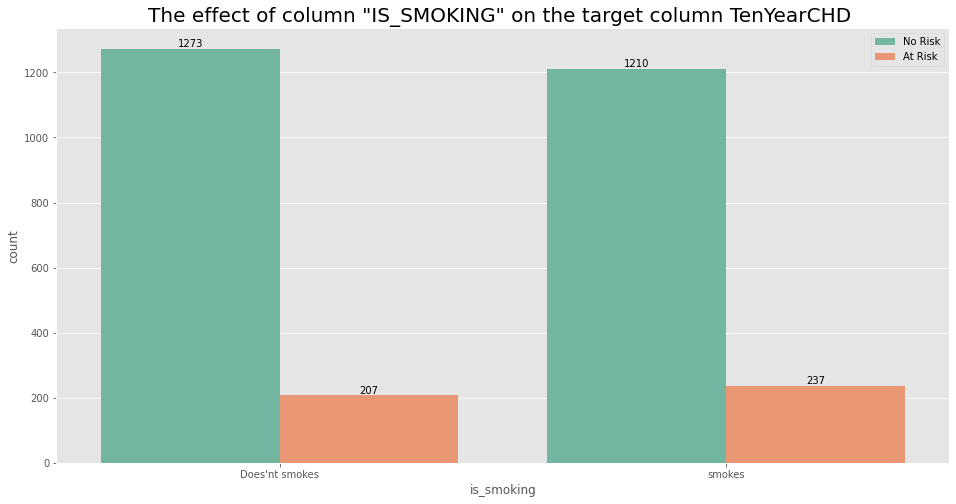

In [108]:
visualizer('is_smoking',["Does'nt smokes", 'smokes'])

### 5. TenYearCHD vs cigsPerDay

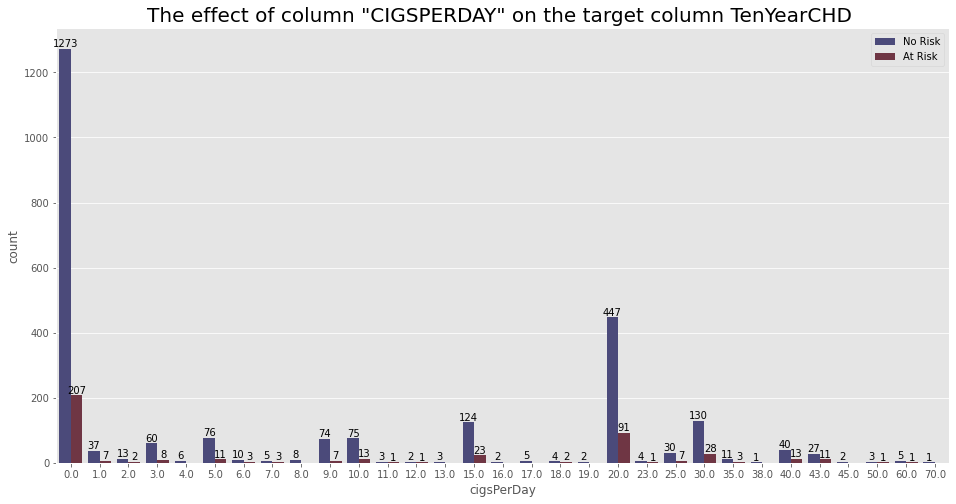

In [109]:
visualizer('cigsPerDay', table= 'no')

### 6. TenYearCHD vs BPMeds

TenYearCHD  >----Not at Risk---->  >----At Risk---->
BPMeds                                              
0.0                          2425                414
1.0                            58                 30


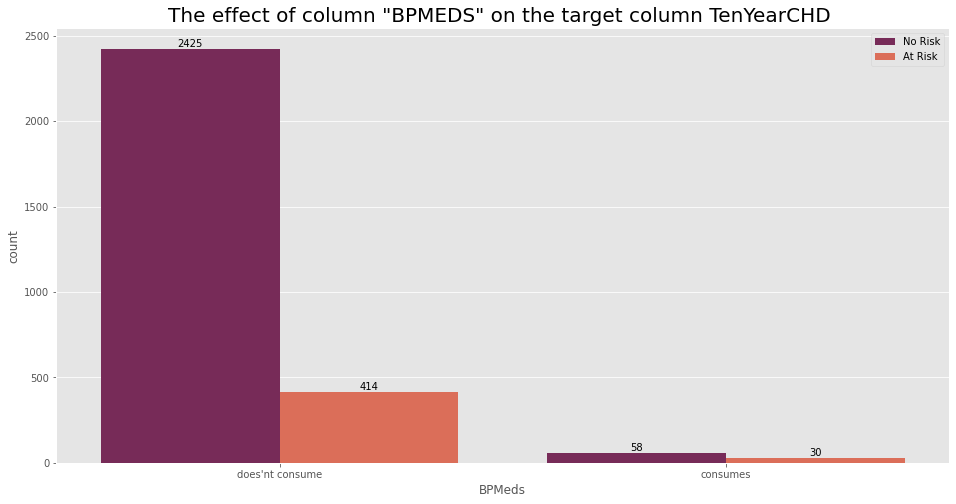

In [110]:
visualizer('BPMeds',["does'nt consume",'consumes'])


### 7. TenYearCHD vs prevalentstrokes

TenYearCHD       >----Not at Risk---->  >----At Risk---->
prevalentStroke                                          
0                                 2472                437
1                                   11                  7


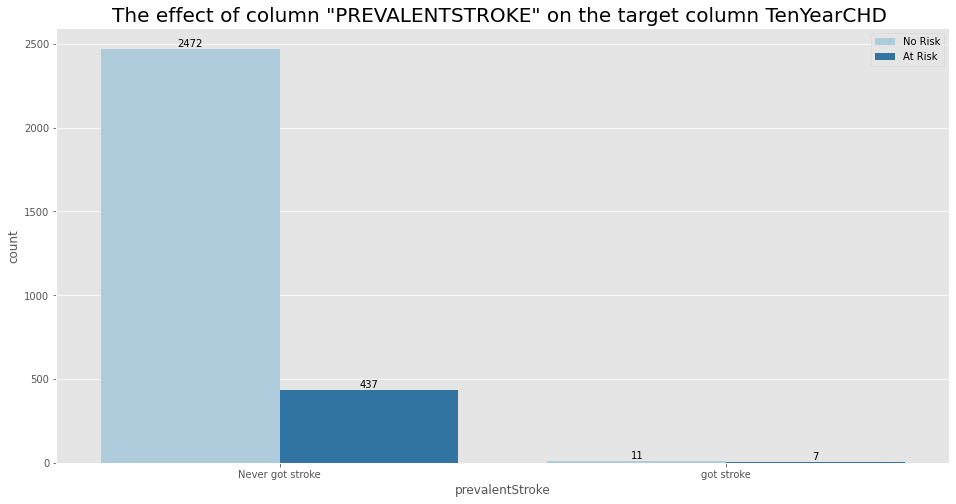

In [111]:
visualizer('prevalentStroke',["Never got stroke",'got stroke'])


### 8. TenYearCHD vs prevalentHyp

TenYearCHD    >----Not at Risk---->  >----At Risk---->
prevalentHyp                                          
0                              1785                222
1                               698                222


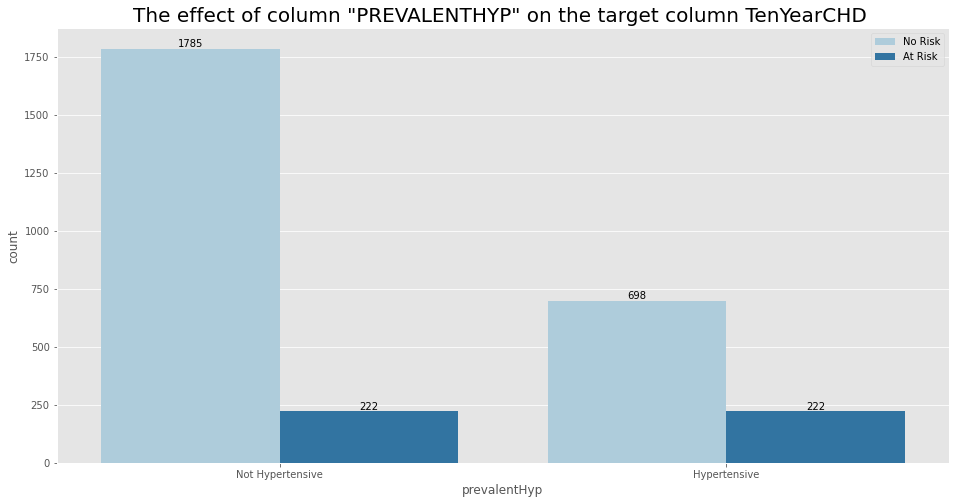

In [112]:
visualizer('prevalentHyp',["Not Hypertensive",'Hypertensive'])

### 9. Smokers vs non-smokers count with age

Text(0.5, 1.0, 'Smokers vs non-smokers count with age')

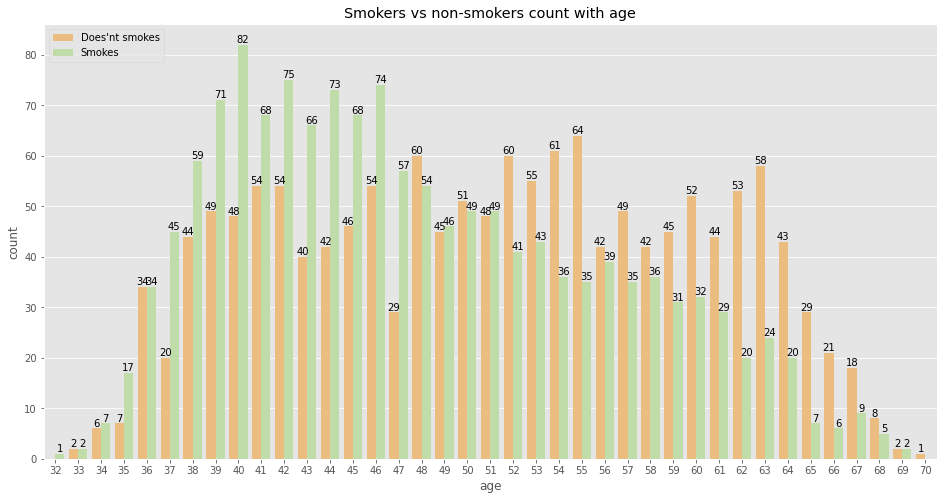

In [113]:

plt.figure(figsize=(16,8))
ax= sns.countplot(x="age",hue="is_smoking",data=cvd_df, palette=(clr_pal()))
plt.legend(["Does'nt smokes",'Smokes'], loc=2)
for i in ax.containers:
      ax.bar_label(i)
plt.title('Smokers vs non-smokers count with age')


### 10. Prevalent Stroke count with age

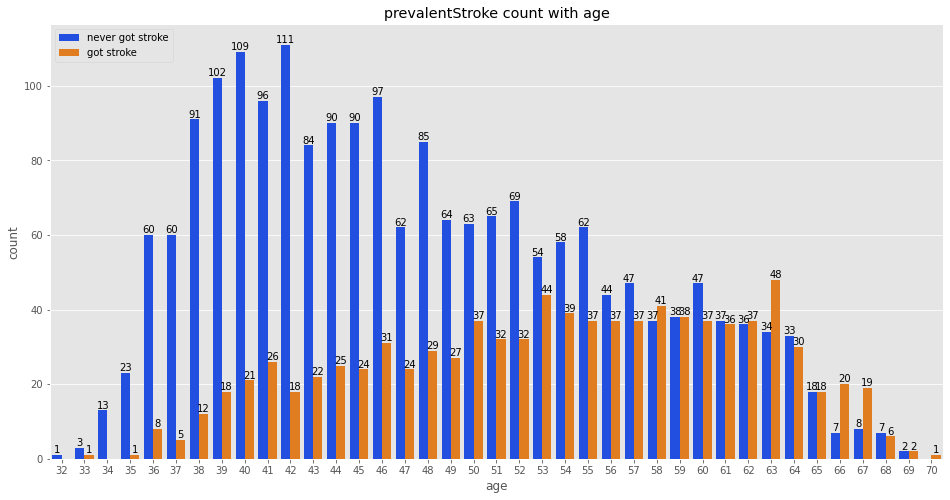

In [114]:

plt.figure(figsize=(16,8))
ax= sns.countplot(x="age",hue="prevalentHyp",data=cvd_df, palette= (clr_pal()))
plt.legend(["never got stroke",'got stroke'], loc=2)
plt.title('prevalentStroke count with age')
for i in ax.containers:
      ax.bar_label(i)

### 11. Average cholestrol level with age

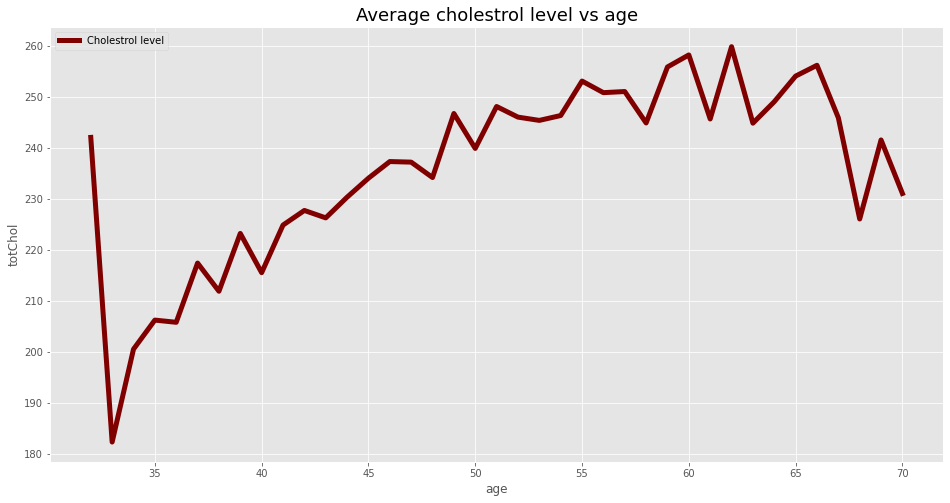

In [115]:
# Plotting the data
chol_eda= cvd_df.groupby('age').mean()['totChol'].reset_index()
plt.figure(figsize=(16,8))
sns.lineplot(x= 'age', y='totChol' , data= chol_eda, color= clr(), linewidth=5)
plt.title('Average cholestrol level vs age',fontsize=18)
plt.legend(['Cholestrol level'], loc=2)


### 12. Average glucose level of diabetic and non-doabetic person

<function matplotlib.pyplot.show(close=None, block=None)>

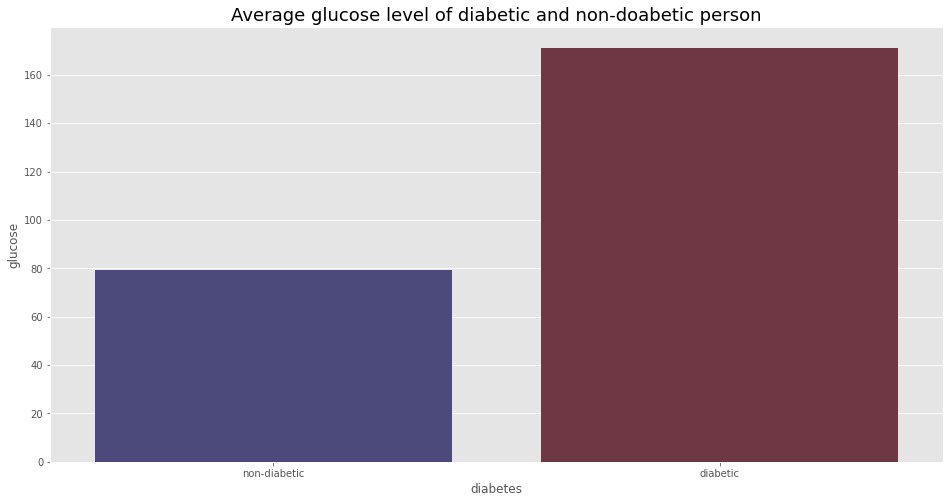

In [116]:
# Plotting the data
diab_eda= cvd_df.groupby('diabetes').mean()['glucose'].reset_index()
plt.figure(figsize=(16,8))
ax= sns.barplot(x= 'diabetes', y='glucose' , data= diab_eda, palette= (clr_pal()))
plt.title('Average glucose level of diabetic and non-doabetic person',fontsize=18)
ax.set(xticklabels = (['non-diabetic', 'diabetic']))
plt.show


## Multivariate analysis

### 1. Age vs other independent variables with comparision to TenYearCHD

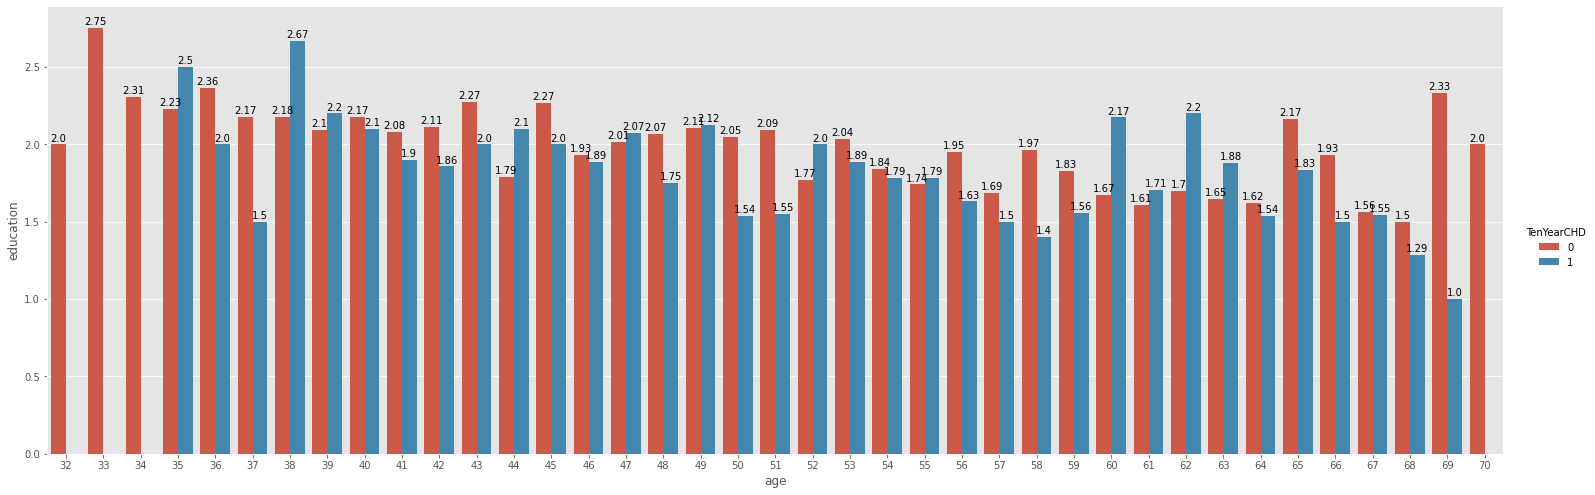

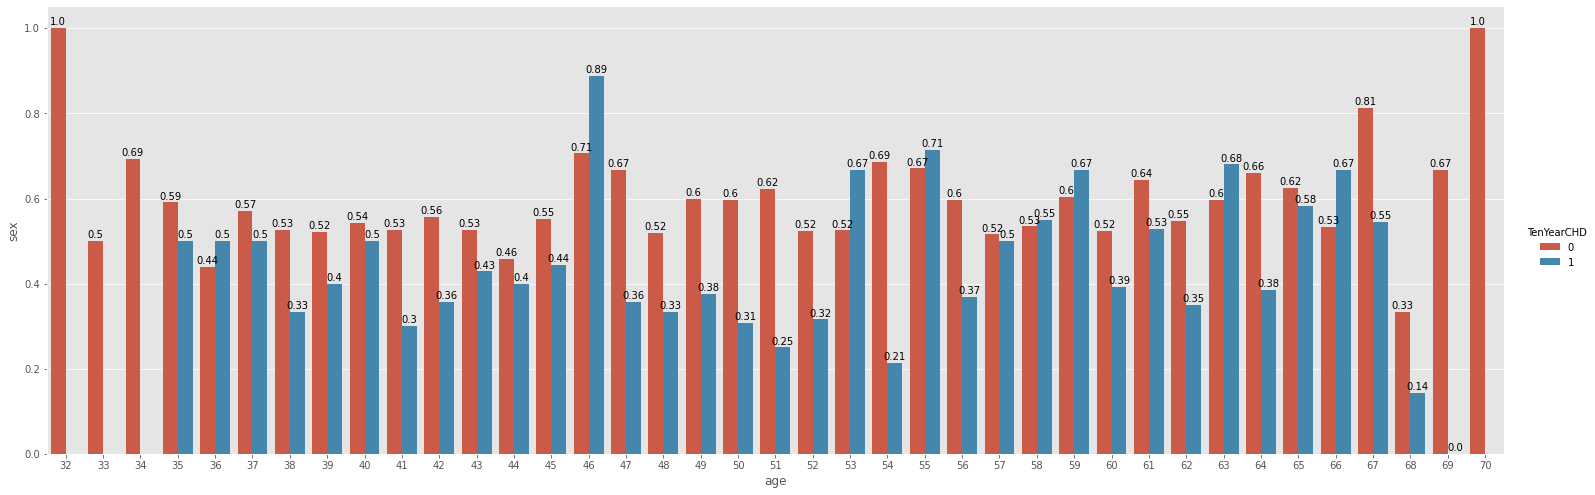

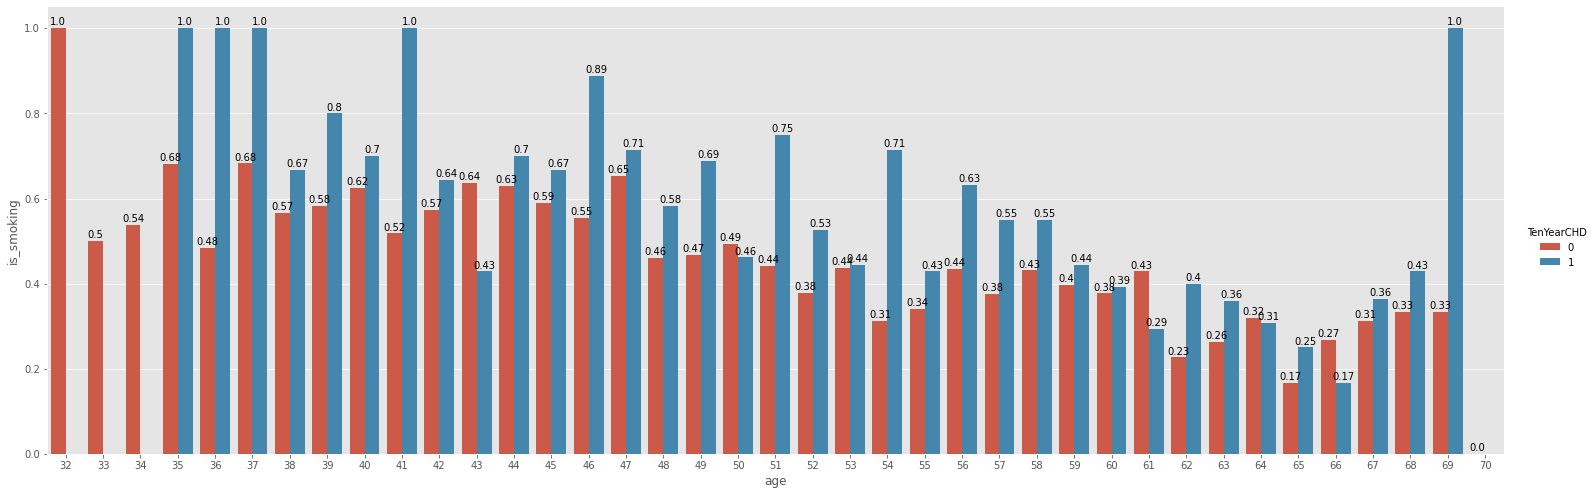

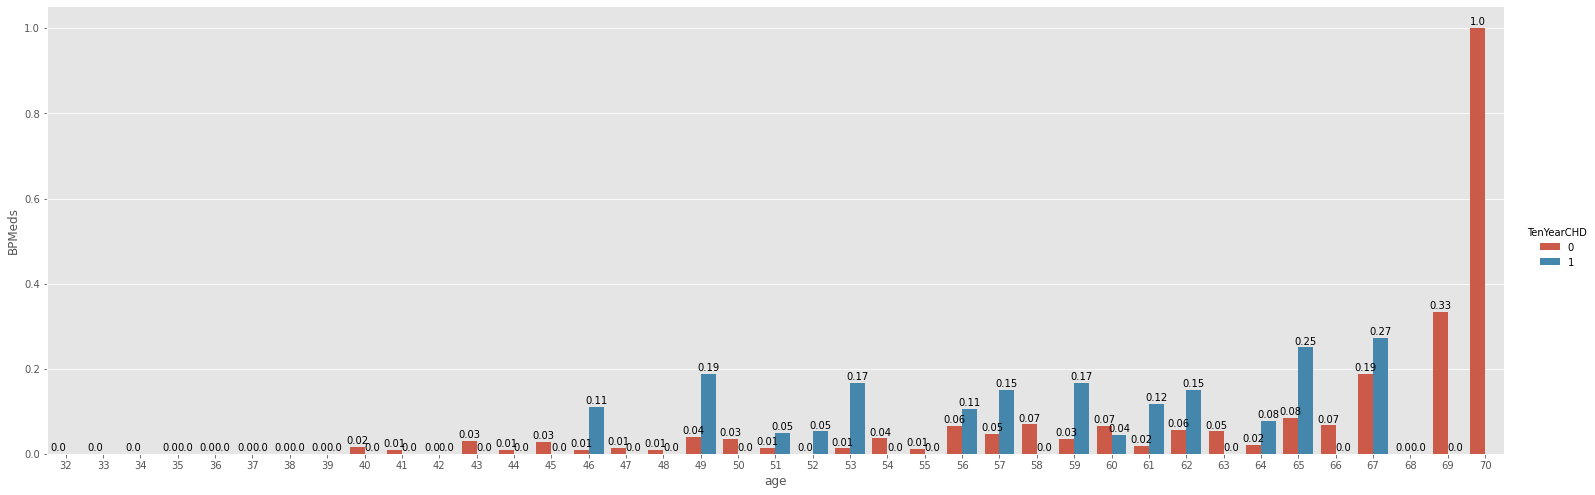

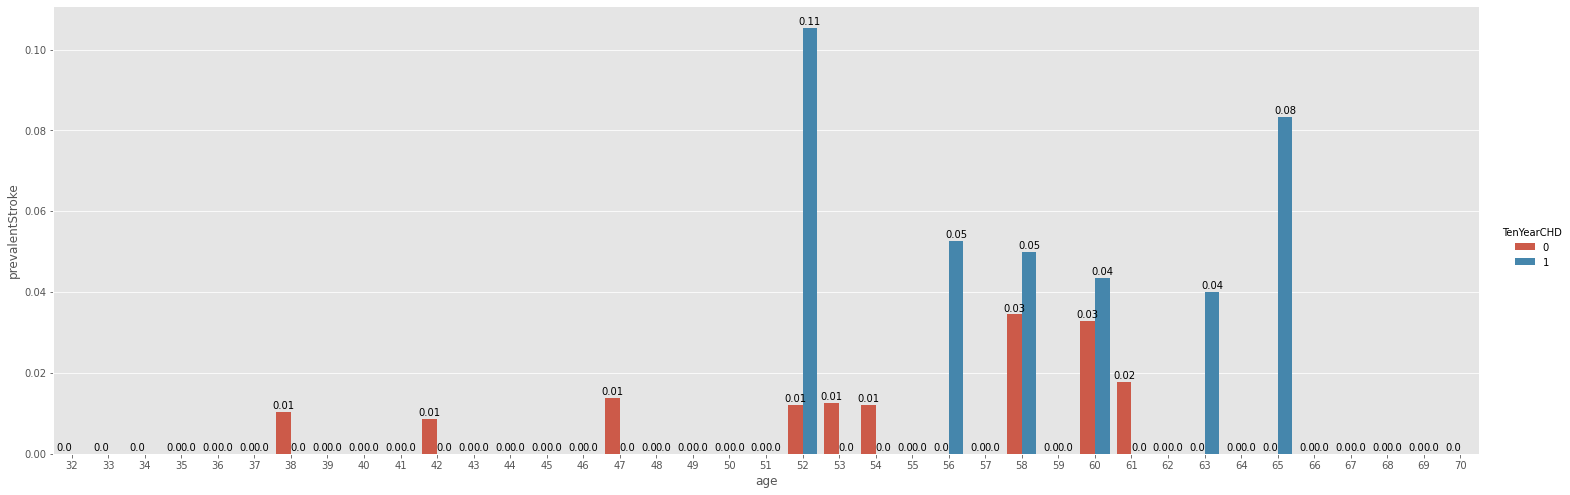

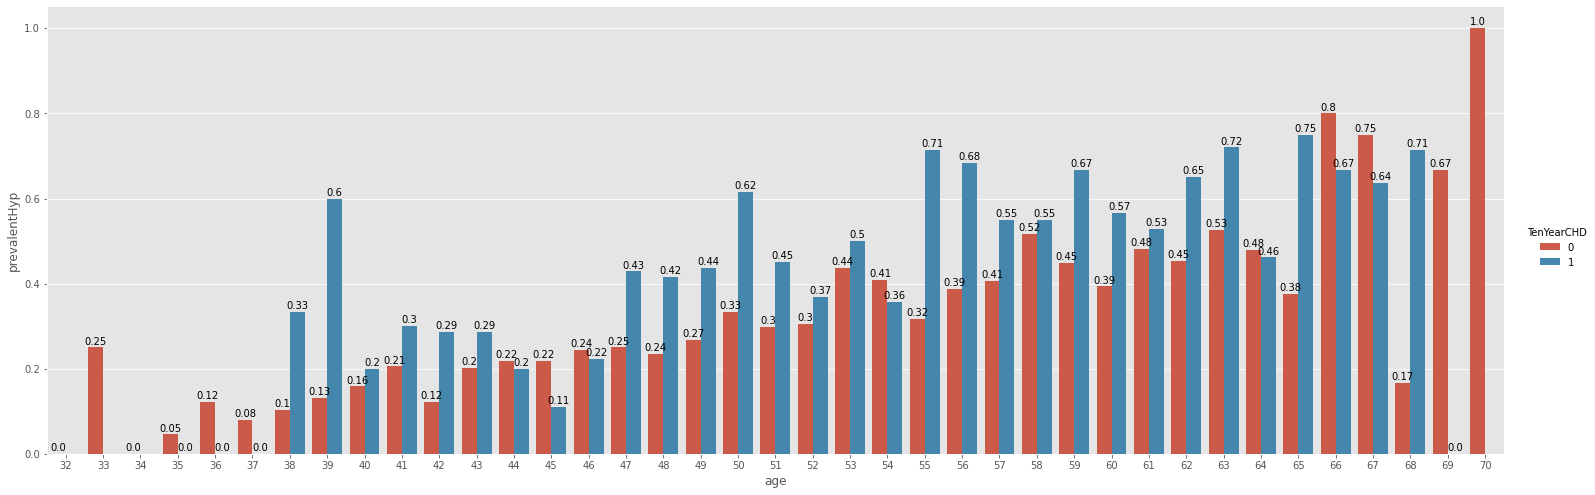

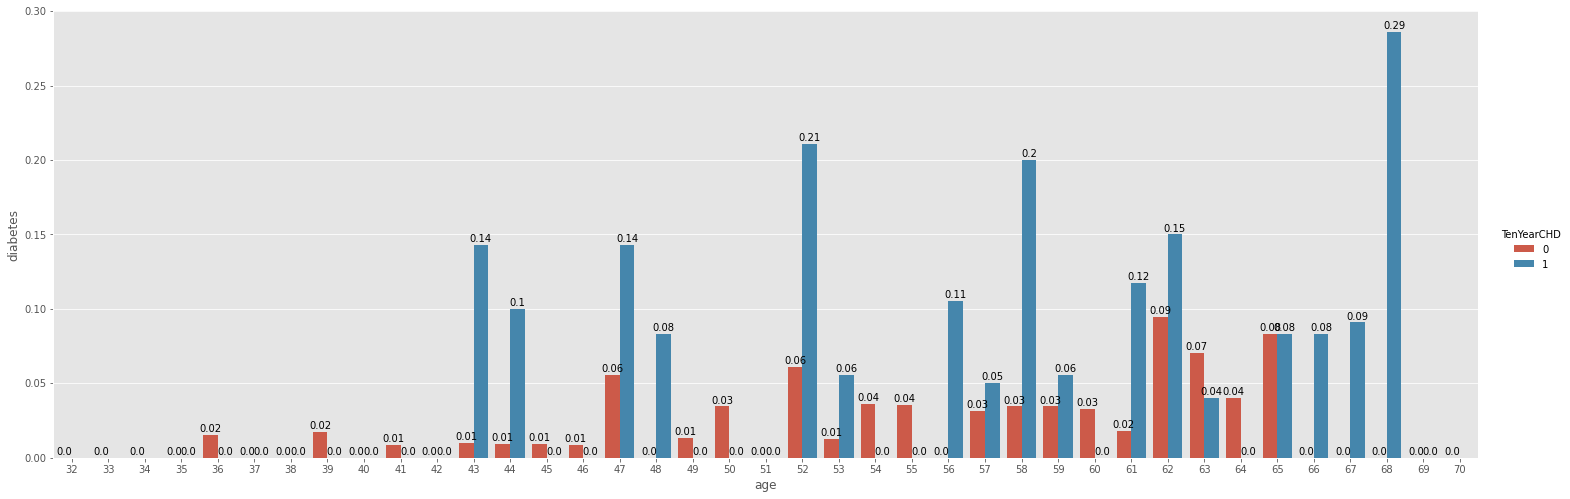

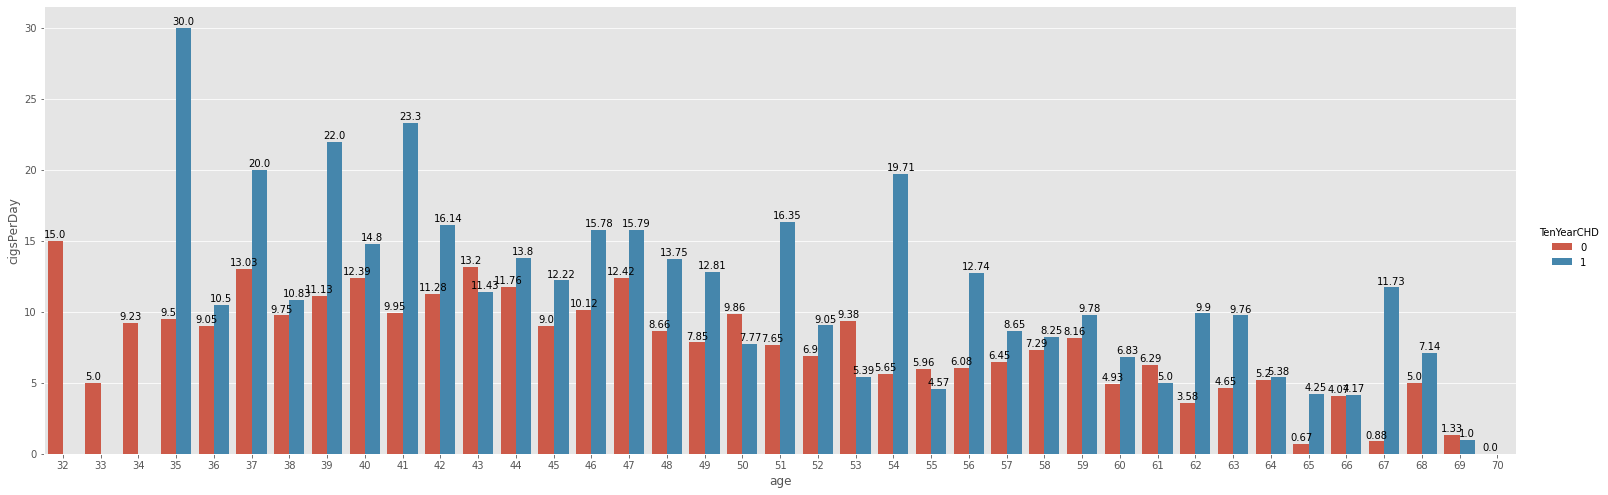

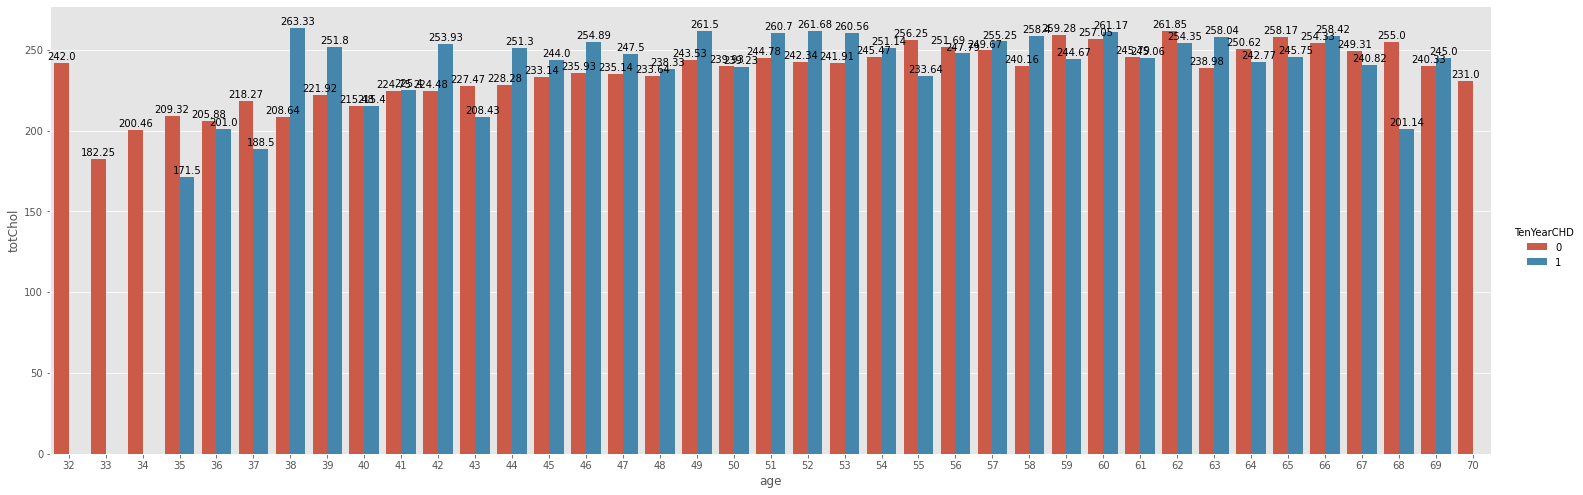

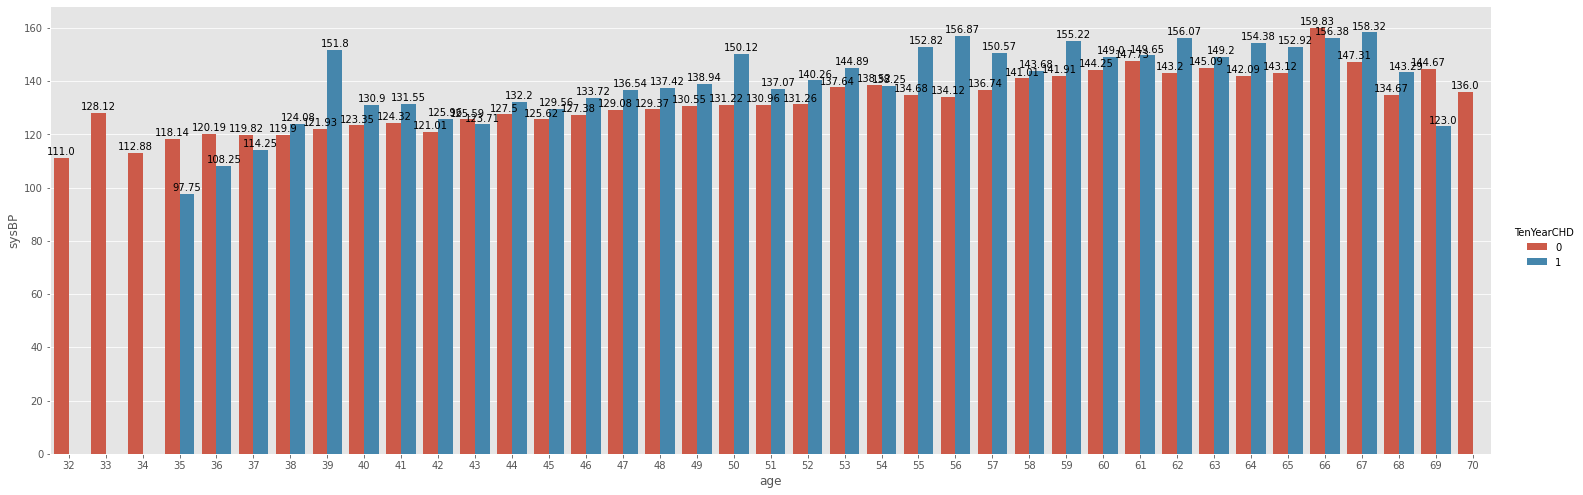

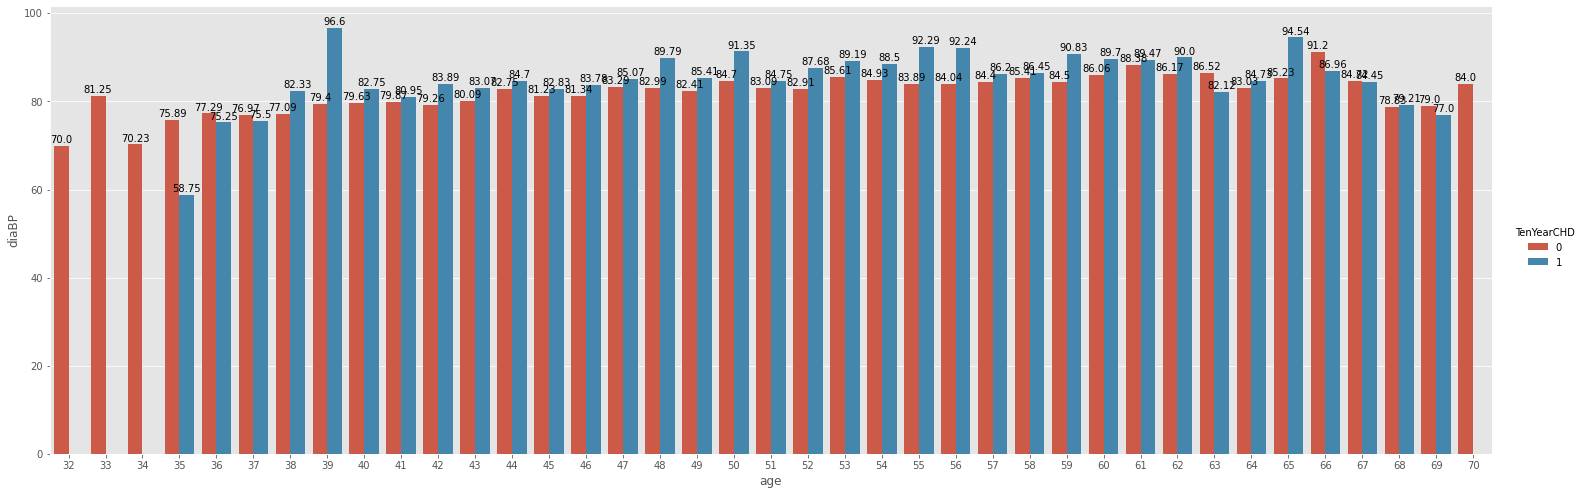

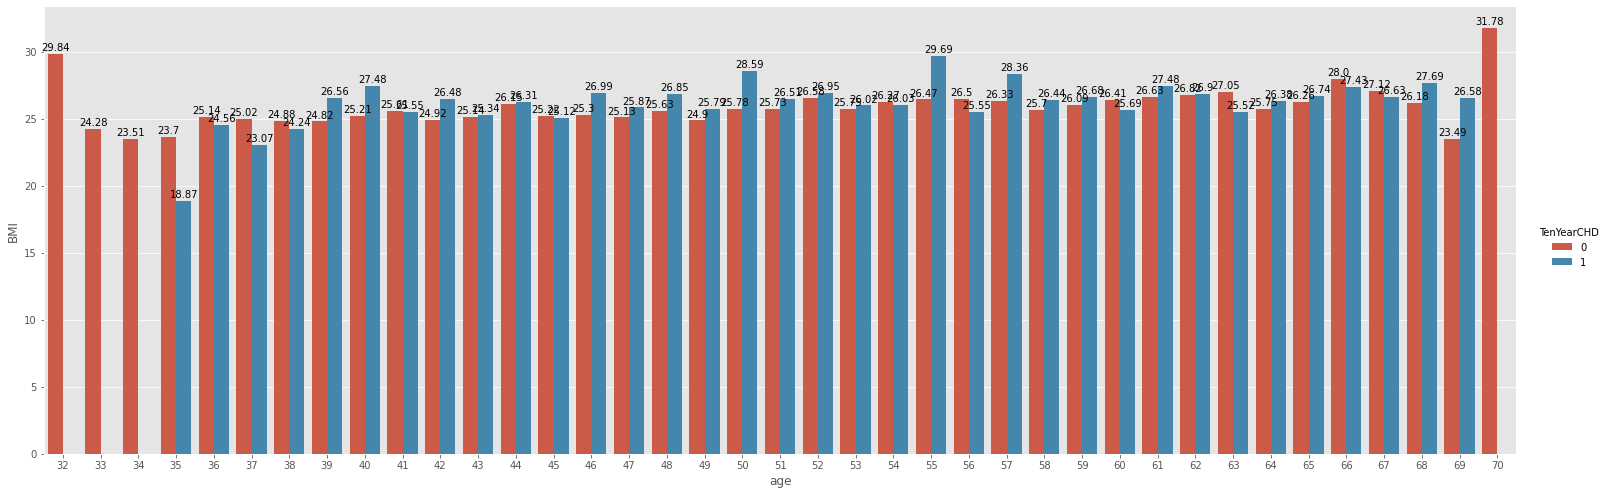

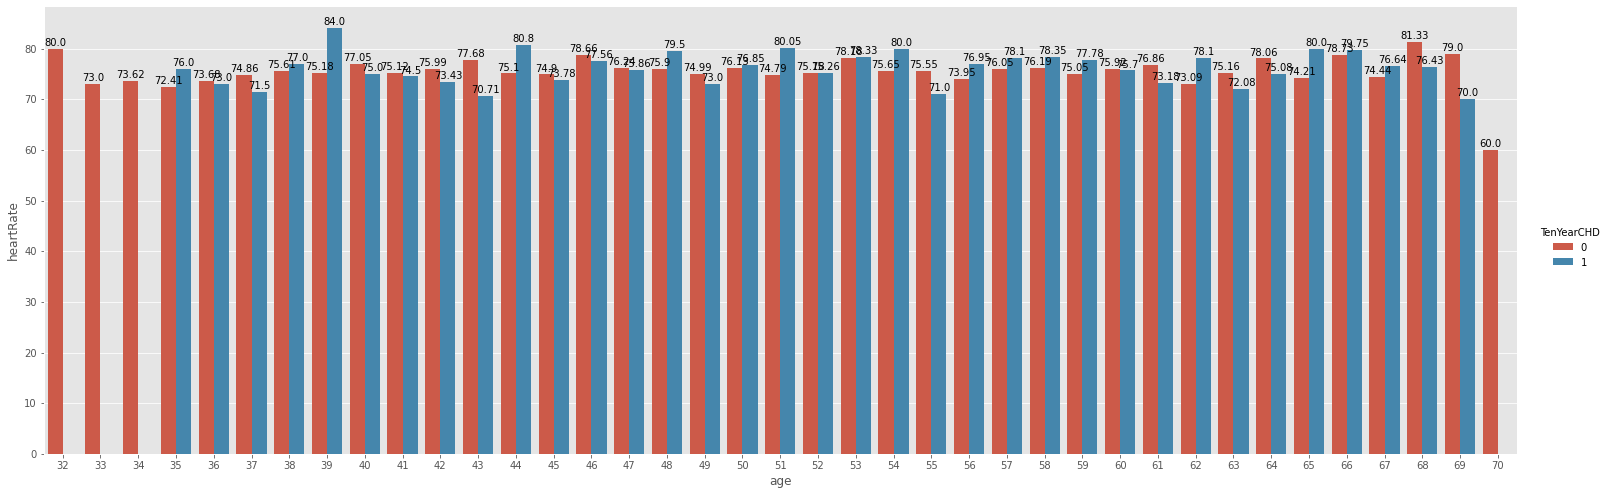

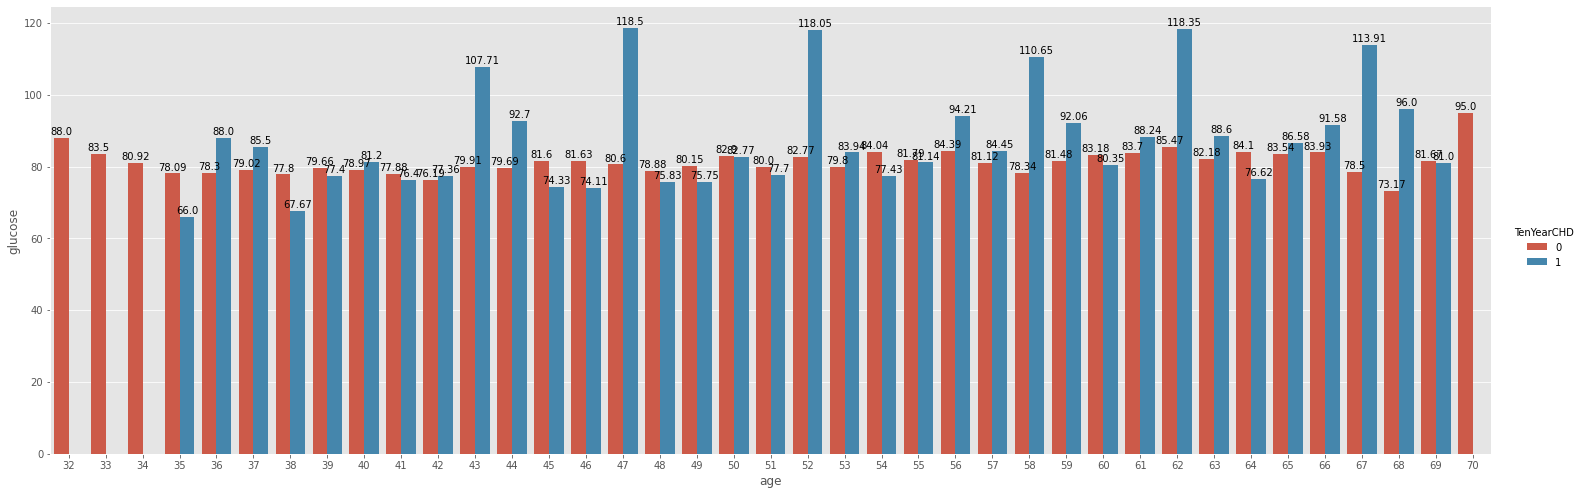

In [117]:
# age vs with other numerical values
for i in independent_features:
  if i!='age':
    ax= sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=cvd_df,legend=True , ci=None)
    ax.fig.set_size_inches(25,8)
    ax.fig.subplots_adjust(top=0.90,right=0.95)
    aa = ax.facet_axis(0, 0)
    for i in aa.containers:
          labels = [f'{round(v.get_height(), 2)}' for v in i]
          aa.bar_label(i, labels=labels, label_type='edge', padding=1)

- **The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.**

- **The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.**

- **If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR**

# dvadvsd


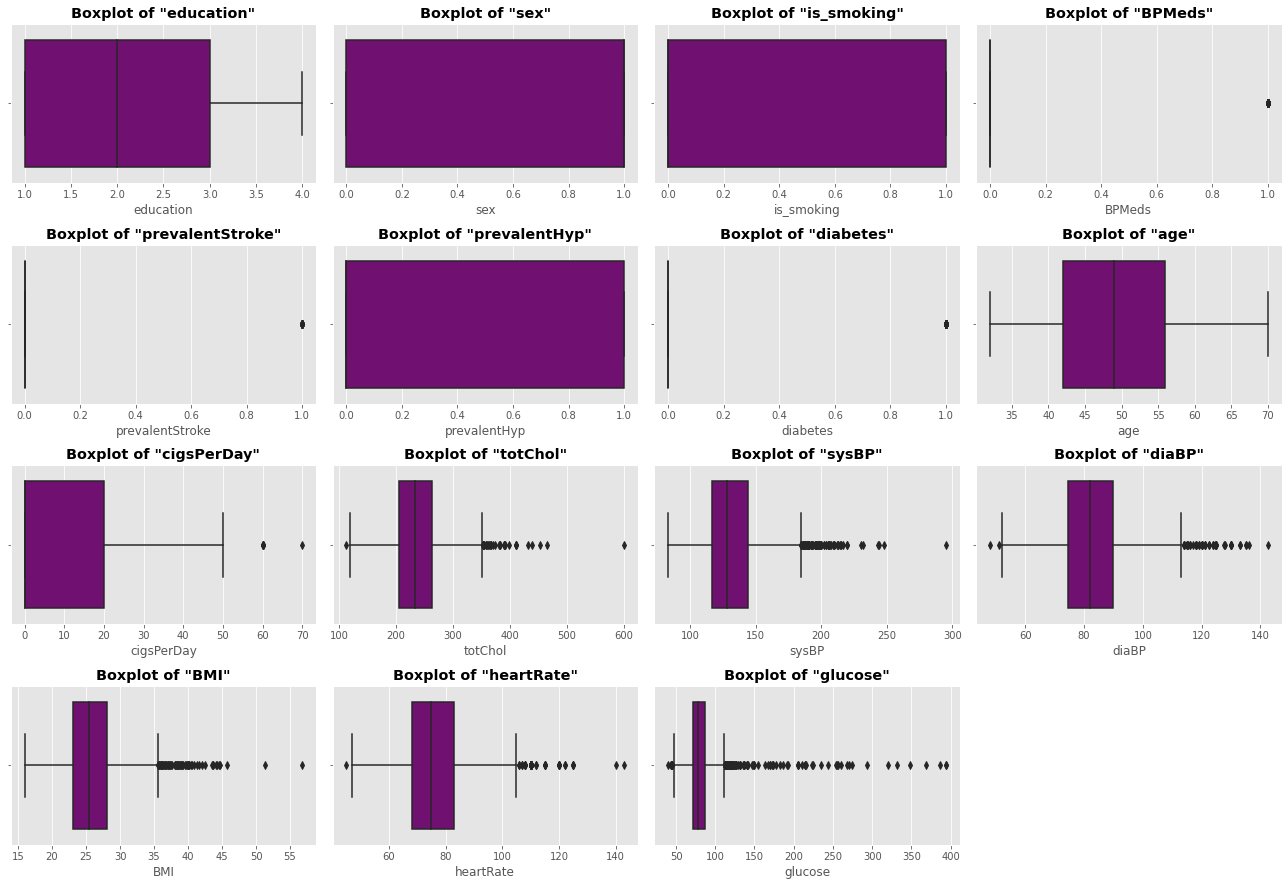

In [118]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (18,15))
for i, column in enumerate(independent_features) :
  plt.subplot(5,4,i+1)
  sns.boxplot(cvd_df[column], color= ('purple'))
  plt.title (f'Boxplot of "{column}"', weight = 'bold')
  plt.tight_layout()
plt.show();


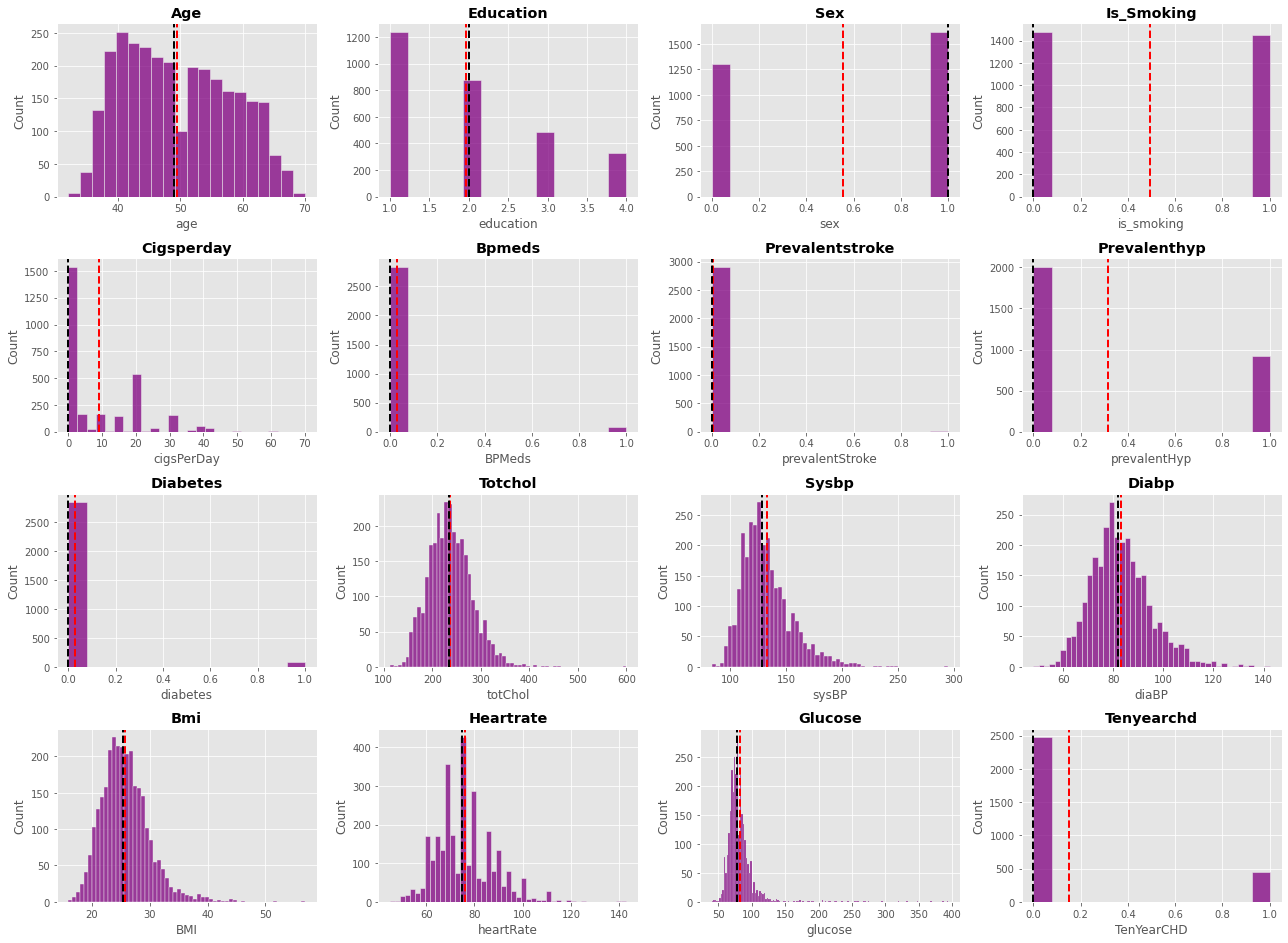

In [119]:
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(cvd_df.columns):
  if cvd_df[column].dtype != object:
    feature = cvd_df[column]
    ax=plt.subplot(5, 4, i+1)
    sns.histplot(feature , color='purple')
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()


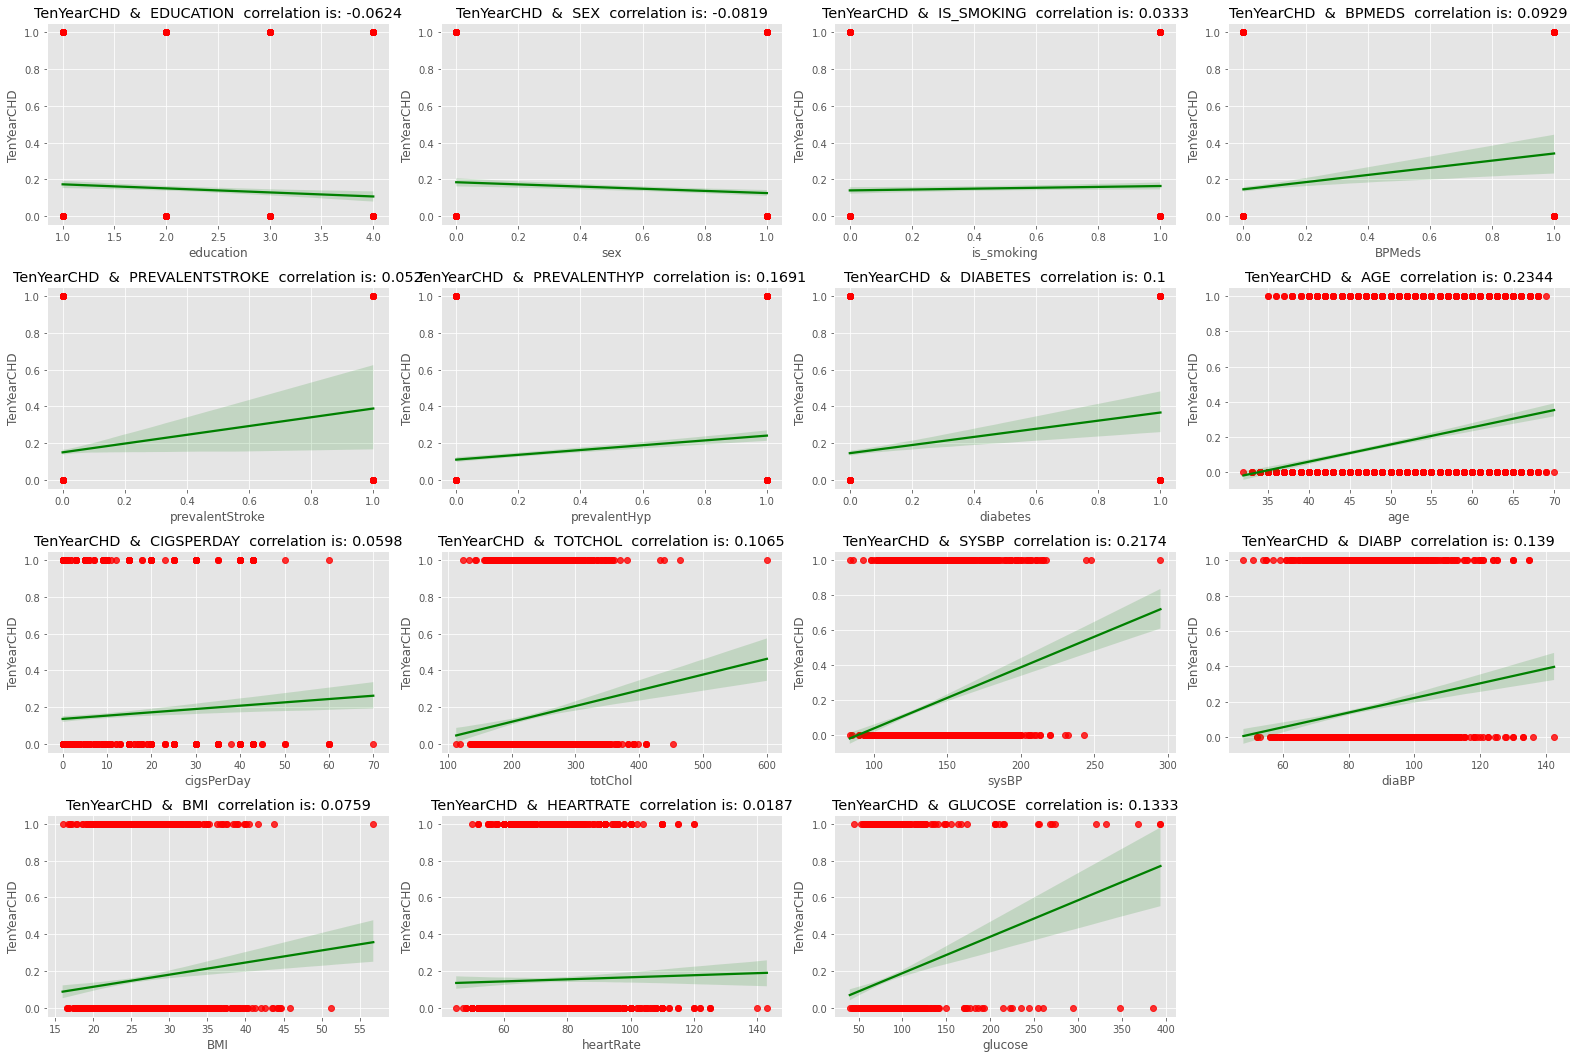

In [120]:
# # Plotting the regression plot for all the Independent features

plt.figure(figsize = (22,18))

for i,col in enumerate(independent_features):
  plt.subplot(5,4,i+1)
  sns.regplot(x= col ,y='TenYearCHD', data=cvd_df , scatter_kws={"color": 'red'}, line_kws={"color": "green"})

  correlation = round(cvd_df[col].corr(cvd_df['TenYearCHD']), 4)
  plt.title('TenYearCHD  &  ' + col.upper() + '  correlation is: ' + str(correlation))

  # plt.title(f'TenYearCHD vs {column.title()}', weight = 'bold')
  plt.tight_layout() 
  


plt.show();



# **FEATURE ENGINEERING**

In [121]:
cvd_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,3.0,1,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## Hypothesis Testing


---



To check whether discrete variables are related, chi2 test can be used. We define:
1. **Null Hypothesis (H0): Two variables are independent.**
2. **Alternate Hypothesis (H1): Two variables are not independent.** 

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [122]:
# chi2 scores
chi_scores = chi2(cvd_df[categorical_features],cvd_df[dependent_features])
chi_scores

(array([ 6.00581652,  8.76259969,  1.64527101, 24.4846018 ,  7.87008359,
        57.41396234, 28.48354153]),
 array([1.42587939e-02, 3.07470462e-03, 1.99603796e-01, 7.49060905e-07,
        5.02593299e-03, 3.53091810e-14, 9.44983806e-08]))

In [123]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = cvd_df[categorical_features].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking         1.996038e-01
education          1.425879e-02
prevalentStroke    5.025933e-03
sex                3.074705e-03
BPMeds             7.490609e-07
diabetes           9.449838e-08
prevalentHyp       3.530918e-14
dtype: float64

<AxesSubplot: title={'center': 'P-value for discrete features'}, xlabel='P-value'>

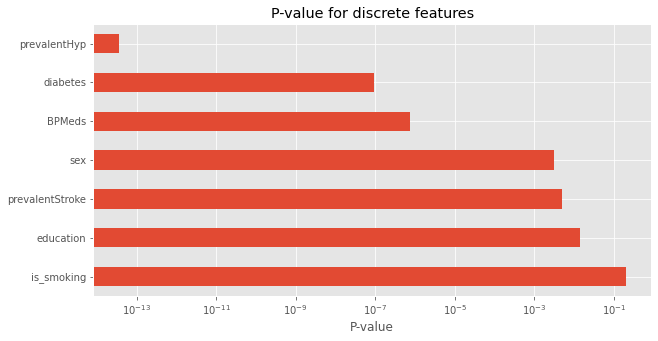

In [124]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

* **Since prevalent hypertension column (prevalentHyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.**
* **The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).**
* **We can drop this column since we already have a column cigsPerDaywhich gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.**

In [125]:
# Droping the column is_smoking
cvd_df = cvd_df.drop("is_smoking", axis=1)

# Removing this column from our features lists
categorical_features.remove('is_smoking')
independent_features.remove('is_smoking')


In [126]:
independent_features

['education',
 'sex',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

## 2. Checking for VIF

### Defining function

In [127]:
cvd_df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,1.0,0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,3.0,1,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [128]:
# Defining function to check VIF

def vif_calculator(X):
 
   # Calculating VIF
   vif_1 = pd.DataFrame()
   vif_1["variables"] = X.columns
   vif_1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif_1)

In [142]:
def vif_calculator(X):
   # Calculating VIF
   vif_1 = pd.DataFrame()
   vif_1["variables"] = X.columns
   vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   vif_1["VIF"] = vif
 
   return vif_1

### Checking VIF for all the independent variables

In [143]:
# Checking VIF for all Independent numeric columns
vif_calculator(cvd_df[[i for i in independent_features]])

TypeError: ignored

In [145]:
X = cvd_df[[i for i in independent_features]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
# for i in range(X.shape[1]):
#   vif_data["VIF"] = [variance_inflation_factor(X.values, i)]
  
# print(vif_data)

for i in range(14):
  print(i)

TypeError: ignored

In [146]:
for i in range(14):
  print(i)

TypeError: ignored

Explaination:-
* As we are interested in classification, we do not need to get rid of collinear variables. These will influence our coefficients, but not the predictions. We can just leave them in.

**Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.**

## 2. Feature Encoding

In [ ]:
# As previously we label encoded some columns tfor better EDA, now we are bringing it back to its original form.

label_encoding = {'sex' : {0 : 'M', 1 : 'F'}, 'is_smoking' : { 0 :'NO' , 1 : 'YES' }}

cvd_df = cvd_df.replace(label_encoding)

print(categorical_features)

In [ ]:
# Using One-hot encoding on following columns in the list
def encoding(data, column):
    ''' this functions takes dataframe and column name/list to encode it(one-hot)'''
    
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data
  
for col in categorical_features:
    cvd_df = encoding(cvd_df, col)


cvd_df.head()

Explaination:-
*  I preffer one-Hot encoding as it creates new column, where in binary encoding we replace 2 values of column into 0 and 1. which may not be prefferable for all algorithms.

## 4. Outlier and Anomaly Treatment

In [ ]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (18,15))
for i, column in enumerate(numerical_features) :
  plt.subplot(5,4,i+1)
  sns.boxplot(cvd_df[column], color= ('purple'))
  plt.title (f'Boxplot of "{column}"', weight = 'bold')
  plt.tight_layout()
plt.show();


Explaination:-
*  In some cases, outliers can represent meaningful data points and removing them may lead to loss of important information. For example, if an outlier in a medical dataset represents a rare disease, removing it could bias the model's predictions. so we are avoiding such removals.
* There are no such impossible values in our dataset, ex- 0 age, 0 glucose, 0 heartrate or values in minus in age. All these situatuions are error in data collection, 

In [ ]:
# checking if our numerical features which cant have 0 value have it or not.

for col in ['age','sysBP','diaBP','BMI','heartRate','glucose']:
  zero_indices = cvd_df[cvd_df[col] ==0].index
  count= len(zero_indices)
  if count > 0:  
    print(f' "{col}" has {count} zero values in it and those are \n  {zero_indices}  \n' )
  else:
    print(f'No 0 values present in "{col}"')


In [ ]:
# Checking range of each column
range=[]
for col in numerical_features:

  column_range = (cvd_df[col].min(), cvd_df[col].max())
  range.append(column_range)

ranges=pd.DataFrame({'columns' :numerical_features, 
                      'Range' :[i for i in range],
                      })
ranges

Explaination:-
* no 0 values in the columns.
* Range is fine no anomaly detected

## 3. Feature transformation

### Distribution check

In [ ]:
# Create a figure with 5 rows and 6 columns
fig, ax = plt.subplots(2,4, figsize=(16,5), tight_layout=True)

# Plot the distribution of each column in the dataframe
for i, col in enumerate(numerical_features):
    row = i // 4
    col_idx = i % 4
    sns.distplot(cvd_df[col], ax=ax[row, col_idx])
    ax[row, col_idx].axvline(cvd_df[col].mean(), color='red', linestyle='solid', linewidth=2 )
    ax[row, col_idx].axvline(cvd_df[col].median(), color='black', linestyle='dashed', linewidth=2 )
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)
    
plt.show()

print(numerical_features)

### Skewness Check

In [ ]:
# Calculate the skew value for each column
skew_values = cvd_df[numerical_features].skew()

# Print the skew values for each column
print(skew_values)

Explaination:-
* Here in all the 8 numerical continous columns we have cigsPerDay and glucose most skewed.

In [ ]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (18,15))
for i, column in enumerate(numerical_features) :
  plt.subplot(5,4,i+1)
  sns.boxplot(cvd_df[column], color= ('purple'))
  plt.title (f'Boxplot of "{column}"', weight = 'bold')
  plt.tight_layout()
plt.show();


### Transforming features

In [ ]:

# def transformer():
# '''This function tzkes data and transforms the column with log or sqrt whichver is better'''


what_happened=[]
i=0
skew_values = cvd_df[numerical_features].skew()

for col in numerical_features:
  
  x1= (np.sqrt(cvd_df[col])).skew()
  x= abs((np.sqrt(cvd_df[col])).skew())
  y= np.log(cvd_df[col])
  y = y.replace(-np.inf, np.nan)
  y= y.fillna(0)
  y1= y.skew()
  y= abs(y.skew())

  


  if abs(skew_values[i])<x and abs(skew_values[i])< y:
    cvd_df[col]=cvd_df[col]
    show='No transformation'
    what_happened.append(show)
    

  elif x < y:
    cvd_df[col]=np.sqrt(cvd_df[col])
    show='Squareroot'
    what_happened.append(show)

  else:
    cvd_df[col]=np.log(cvd_df[col])
    cvd_df[col] = cvd_df[col].replace(-np.inf, np.nan)
    cvd_df[col].fillna( 0 , inplace=True)
    show='Log'
    what_happened.append(show)

  i=i+1
  
data_=pd.DataFrame({'columns' :numerical_features, 
                      'Transformation Type' :[i for i in what_happened],
                      'Old skew value' :[i for i in skew_values],
                      'New skew value' :[i for i in cvd_df[numerical_features].skew()]
                      })
data_


### Range Check

In [ ]:
# Checking range of each column
range=[]
for col in numerical_features:

  column_range = (cvd_df[col].min(), cvd_df[col].max())
  range.append(column_range)

ranges=pd.DataFrame({'columns' :numerical_features, 
                      'Range' :[i for i in range],
                      })
ranges

### Distribution Check

In [ ]:
# Create a figure with 5 rows and 6 columns
fig, ax = plt.subplots(2,4, figsize=(16,5), tight_layout=True)

# Plot the distribution of each column in the dataframe
for i, col in enumerate(numerical_features):
    row = i // 4
    col_idx = i % 4
    sns.distplot(cvd_df[col], ax=ax[row, col_idx])
    ax[row, col_idx].axvline(cvd_df[col].mean(), color='red', linestyle='solid', linewidth=2 )
    ax[row, col_idx].axvline(cvd_df[col].median(), color='black', linestyle='dashed', linewidth=2 )
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)
    
plt.show()

print(numerical_features)

## **Performing Log Transformation**


---



In [ ]:
# Implementing log transformation on continuous variables

df['age']                   = np.log10(df['age']+1)
df['cigsPerDay']          = np.log10(df['cigsPerDay']+1)
df['totChol']     = np.log10(df['totChol']+1)
df['BMI']                   = np.log10(df['BMI']+1)
df['heartRate']            = np.log10(df['heartRate']+1)
df['glucose']               = np.log10(df['glucose']+1)
df['pulse_pressure']        = np.log10(df['pulse_pressure']+1)

In [ ]:
# Checking skew after log transformation
df[continuous_var].skew(axis = 0)

## **Analyzing the distribution of transformed features:**


---



In [ ]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**Except cigsPerDay, we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.**

## **Checking for outliers in transformed features:**


---



In [ ]:
# checking for outliers in log transformed features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

* **Except for age and cigsPerDay columns, rest of the numerical columns contain outliers even after log transformation.**
* **To handle this, we can impute the outliers beyond 3 standard deviations from the mean with its median value on the train data.**

# **TARGET FEATURE CONDITIONING**

# **IMBALANCE HANDLING**

# **MODEL IMPLEMENTATION**

# **EVALUATION**

# **MODEL EXPLAINABILITY**

# **CONCLUSION**